<a href="https://colab.research.google.com/github/ucfilho/Dam_Project_Methods/blob/master/Metodo_11_xgboost_campo_E6_nov_19_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega bibliotecas principais
import numpy as np
import pandas as pd
from pandas import read_excel
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Dam_Project_Methods #clonar do Github
%cd Dam_Project_Methods
import Go2Confusion


Cloning into 'Dam_Project_Methods'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.
/content/Dam_Project_Methods


In [3]:
# clicar no botao e selecionar o arquivo
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Planilha campo_E6.xlsx to Planilha campo_E6.xlsx


In [0]:
my_sheet = 'parcelas'
file_name = 'Planilha campo_E6.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet,header=1)

In [0]:

Nomes=['Est.','Parc','CAP(cm)','DAP(cm)','H(m)','Nome comum'] # neste caso nao tem cm em DAP e Parc esta como Par
XY=df[Nomes]
XY=XY.dropna()


In [0]:
numbers = np.unique(XY['Nome comum'], return_inverse=True)
#print(numbers)

In [0]:
XY['Tree']=pd.Series(numbers[1])
#print(XY)

In [0]:
#Nomes_X=['Tree','Par','CAP(cm)','DAP','H(m)']
Nomes_X=['Tree','CAP(cm)','DAP(cm)','H(m)'] # ???? o que representa Par ???
Nomes_Y=['Est.']
X=XY[Nomes_X]
Y=XY[Nomes_Y]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


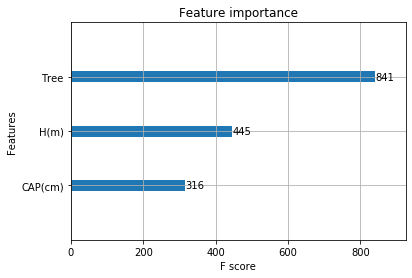

In [9]:
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [0]:
# para objeto de pesquisa deve-se tomar as medidas CAP no lugar de DAP por esta
# ser mais sensivel (PRINCIPIOS BASICOS DE DENDOMETRIA, pag. 18)
# http://esalqlastrop.com.br/img/aulas/24_principios_dendrometria.pdf

In [0]:
# circunferência à altura do peito (CAP) 
# DAP (diâmetro a altura do peito)

In [12]:
print(X.head())

   Tree  CAP(cm)    DAP(cm)  H(m)
0    79       32  10.185916  11.0
1    65       94  29.921129  14.0
2    73       40  12.732395  10.0
3    69       22   7.002817   5.0
4    69       38  12.095776  12.0


In [0]:
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.25, random_state = 0)
Xt=np.array(Xt);yt=np.array(yt);Xv=np.array(Xv);yv=np.array(yv);


In [14]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(Xt, yt)

y_pred = xgb_model.predict(Xv)

cm, precision, recall=Go2Confusion.Confusao(yv,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print(cm)
print("precisao",precision)
print("recall",recall)

[[27 12  0]
 [ 6 70  4]
 [ 0  1 70]]
precisao [0.81818182 0.84337349 0.94594595]
recall [0.69230769 0.875      0.98591549]


In [16]:
print(XY.describe())

            Est.        Parc     CAP(cm)     DAP(cm)        H(m)        Tree
count  759.00000  759.000000  759.000000  759.000000  759.000000  759.000000
mean     2.12780    9.067194   34.189723   10.882927    6.577470   45.686430
std      0.74844    4.991493   20.109945    6.401194    3.384659   22.759595
min      1.00000    1.000000   16.000000    5.092958    1.500000    0.000000
25%      2.00000    5.000000   20.000000    6.366198    3.500000   27.000000
50%      2.00000    9.000000   27.000000    8.594367    6.000000   53.000000
75%      3.00000   13.000000   41.000000   13.050705    9.000000   66.000000
max      3.00000   18.000000  149.000000   47.428173   17.000000   82.000000


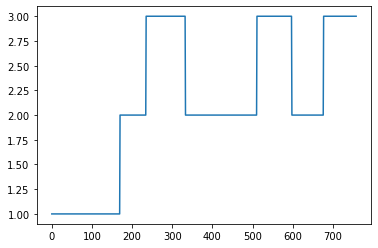

In [17]:

plt.plot(Y)